# Sentiment analysis

## Import Libraries

In [160]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from pickle import dump
import contractions
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [161]:
# URL data CSV
url = "https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv"

# Read CSV
total_data = pd.read_csv(url)

# Save dataset in rute
total_data.to_csv("/workspaces/ml-proyect-naive-bayes/data/raw/playstore_reviews.csv")

In [162]:
total_data

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0
...,...,...,...
886,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it...,1
887,com.rovio.angrybirds,all time legendary game the birthday party le...,1
888,com.rovio.angrybirds,ads are way to heavy listen to the bad review...,0
889,com.rovio.angrybirds,fun works perfectly well. ads aren't as annoy...,1


## DataSet Cleaning

### Eliminate irrelevant information

In [163]:
total_data.drop("package_name", axis=1, inplace=True)

### Expand contractions function

In [164]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

In [165]:
# Expand the contractions on the review column
total_data["review"] = total_data["review"].apply(expand_contractions)

In [166]:
## Convert data to lowercase
total_data["review"] = total_data["review"].str.strip().str.lower()

In [167]:
total_data["review"].head(10)

0    privacy at least put some option appear offlin...
1    messenger issues ever since the last update, i...
2    profile any time my wife or anybody has more t...
3    the new features suck for those of us who do n...
4    forced reload on uploading pic on replying com...
5    i do not know i cannot edit my posts? things s...
6    major flaws constant updates and always gettin...
7    video issues since i was forced into this upda...
8    this update completely destroyed my facebook. ...
9    posting issues for the last week, there is bee...
Name: review, dtype: object

In [168]:
# Replace non-alphanumeric characters
total_data["review"] = total_data["review"].replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)

In [169]:
total_data["review"].head(10)

0    privacy at least put some option appear offlin...
1    messenger issues ever since the last update  i...
2    profile any time my wife or anybody has more t...
3    the new features suck for those of us who do n...
4    forced reload on uploading pic on replying com...
5    i do not know i cannot edit my posts  things s...
6    major flaws constant updates and always gettin...
7    video issues since i was forced into this upda...
8    this update completely destroyed my facebook  ...
9    posting issues for the last week  there is bee...
Name: review, dtype: object

## Divide the dataset

In [170]:
X = total_data["review"]
y = total_data["polarity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24, stratify= y)

# Save data
X_train.to_csv("/workspaces/ml-proyect-naive-bayes/data/interim/train_x.csv", index = False)
y_train.to_csv("/workspaces/ml-proyect-naive-bayes/data/interim/train_y.csv", index = False)
X_test.to_csv("/workspaces/ml-proyect-naive-bayes/data/interim/test_x.csv", index = False)
y_test.to_csv("/workspaces/ml-proyect-naive-bayes/data/interim/test_y.csv", index = False)

X_train.head()

287    not letting me log in  i try to log into my ac...
815    thanks you so much for adding sanshkar fm kala...
241    kill pages i will enter a url or open a new li...
697    its really lovely apps   i am allready using a...
37     used to be good everything was great  until i ...
Name: review, dtype: object

In [171]:
# Transform the text into a word count matrix.
vec_model = CountVectorizer(stop_words = "english")
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

# Save data
np.savetxt("/workspaces/ml-proyect-naive-bayes/data/processed/train_x_vect.csv", X_train, delimiter=",")

np.savetxt("/workspaces/ml-proyect-naive-bayes/data/processed/test_x_vect.csv", X_train, delimiter=",")

X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Multinomial Model

In [172]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Save model
dump(model, open("/workspaces/ml-proyect-naive-bayes/models/model_basic.pk", "wb"))

### Basic model

In [173]:
y_pred = model.predict(X_train)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [174]:
accuracy_score(y_train, y_pred)

0.9536516853932584

In [175]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [176]:
accuracy_score(y_test, y_pred)

0.8491620111731844

### Confusion matrix

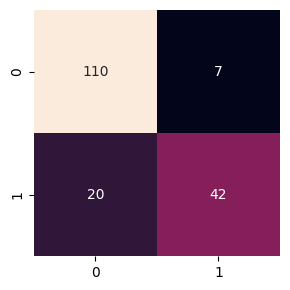

In [177]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [178]:
# Dictionary for search best naive model

hyperparams = {"alpha": [1, 1.5, 1.8, 1.9, 2, 3, 4],
"force_alpha": [True, False],
"fit_prior": [True, False],
"class_prior": [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8], None]}

### Best model with GridSearch

In [179]:
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 1.5, 1.8, 1.9, 2, 3, 4],
                         'class_prior': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],
                                         None],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [180]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [1, 1.5, 1.8, 1.9, 2, 3, 4],
                         'class_prior': [[0.3, 0.7], [0.4, 0.6], [0.2, 0.8],
                                         None],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [181]:
grid.best_params_

{'alpha': 3, 'class_prior': [0.3, 0.7], 'fit_prior': True, 'force_alpha': True}

In [182]:
best_model = grid.best_estimator_

# Save model
dump(best_model, open("/workspaces/ml-proyect-naive-bayes/models/best_model_gs.pk", "wb"))

In [183]:
y_pred = best_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9283707865168539

In [184]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8603351955307262

### Best model with ParameterGrid

In [185]:
accs = []
for combination in ParameterGrid(hyperparams):
    model = MultinomialNB(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))

best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = MultinomialNB(**best_combination)
best_model.fit(X_train, y_train)

# Save model
dump(best_model, open("/workspaces/ml-proyect-naive-bayes/models/best_model_pg.pk", "wb"))

best_combination

{'alpha': 1, 'class_prior': None, 'fit_prior': False, 'force_alpha': True}

In [186]:
y_pred = best_model.predict(X_train)
accuracy_score(y_train, y_pred)

0.9606741573033708

In [187]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8435754189944135

### Confusion_matrix

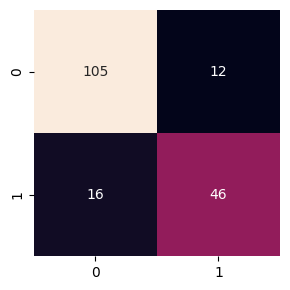

In [188]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

Conclusion:

The best naive model obtained is the best_model_pg, where I achieved a 96% accuracy on the train set and an 84% accuracy on the test set.